# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [17]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [6]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

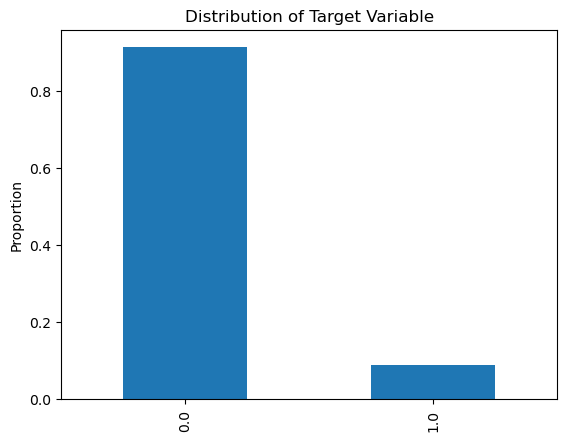

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Check the distribution of the target variable
target_variable = 'fraud'  # Replace with the actual name of your target variable
distribution = fraud[target_variable].value_counts(normalize=True)

# Plot the distribution
distribution.plot(kind='bar', title='Distribution of Target Variable')
plt.ylabel('Proportion')
plt.show()

# Print the distribution to the console
print(distribution)


We can consider this dataset to be imbalanced.

Why is it considered imbalanced?
In a balanced dataset, we expect the classes to be roughly equal in proportion. However, in this case, the fraud cases (class 1) constitute only 8.74% of the total data, while the non-fraud cases (class 0) make up the vast majority at 91.26%. This large disparity between the two classes indicates that the model might be biased toward predicting the majority class (non-fraud) more often, which can lead to poor performance in identifying the minority class (fraud).

- **2.** Train a LogisticRegression.

In [13]:


# Split the data into features and target
X =fraud.drop(columns=[target_variable])
y = fraud[target_variable]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

ROC AUC Score: 0.9663789044916972


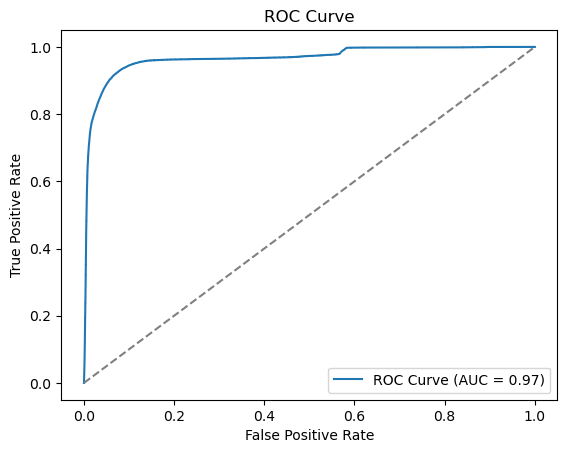

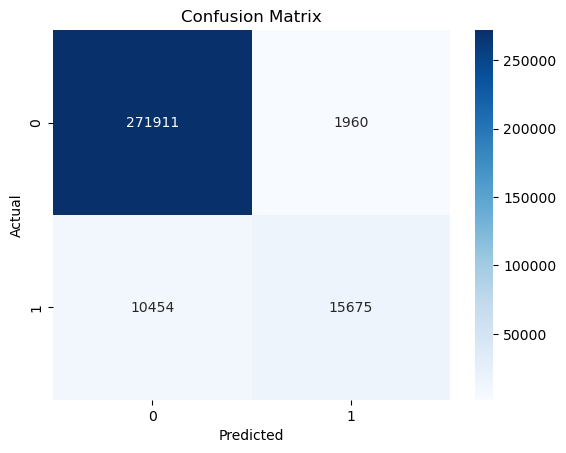

In [14]:


# Predict the probabilities and the classes
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate and display the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [18]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model on the oversampled data
model.fit(X_train_resampled, y_train_resampled)

# Repeat the evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    273871
         1.0       0.57      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC AUC Score: 0.9790414567580402


- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model on the undersampled data
model.fit(X_train_resampled, y_train_resampled)

# Repeat the evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    273871
         1.0       0.57      0.95      0.71     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC AUC Score: 0.9789862064280481


- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model on the SMOTE resampled data
model.fit(X_train_resampled, y_train_resampled)

# Repeat the evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273871
         1.0       0.57      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC AUC Score: 0.9790589800855688


**7.Evaluate**

In [27]:
import pandas as pd

# Define the results in a dictionary
results_dict = {
    "Model": ["Logistic Regression", "Random Over Sampler", "Random Under Sampler", "SMOTE"],
    "ROC AUC Score": [0.9663789044916972, 0.9790414567580402, 0.9789862064280481, 0.9790589800855688]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results_dict)

results_df


,Model,ROC AUC Score
0,Logistic Regression,0.966379
1,Random Over Sampler,0.979041
2,Random Under Sampler,0.978986
3,SMOTE,0.979059


In [30]:
# Find the method with the best ROC AUC score
best_result = results_df.loc[results_df['ROC AUC Score'].idxmax()]

print(f"According to these results, SMOTE achieved the highest ROC AUC score, so it can be considered the best resampling technique among the ones you tested.\nThe best result is:\n{best_result}")


According to these results, SMOTE achieved the highest ROC AUC score, so it can be considered the best resampling technique among the ones you tested.
The best result is:
Model               SMOTE
ROC AUC Score    0.979059
Name: 3, dtype: object
